# Gradient descent for linear regression and polynomial fits
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/ann_gradientDescent_linearRegression.ipynb)

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats, odr


import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (12.0 / 2, 8.0 / 2)

In [2]:
# random numbers
RNG_SEED = 99
get_ipython().run_line_magic("env", f"PYTHONHASHSEED={RNG_SEED}")
# %env PYTHONHASHSEED=RNG_SEED
np.random.seed(RNG_SEED)

env: PYTHONHASHSEED=99


# Gradient descent for linear regression

I got this linear regression material from the following site. The main gif and github links are also provided below.

Main Page:
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

github: 
https://github.com/chasinginfinity/ml-from-scratch/tree/master/02%20Linear%20Regression%20using%20Gradient%20Descent

gif showing gradient descent at work: 
https://github.com/chasinginfinity/ml-from-scratch/blob/master/02%20Linear%20Regression%20using%20Gradient%20Descent/animation1.gif

In [3]:
# Input data
url = "https://github.com/chasinginfinity/ml-from-scratch/raw/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv"
data = pd.read_csv(url)

X = np.array(data.iloc[:, 0])
X = X - np.mean(X)
Y = np.array(data.iloc[:, 1])

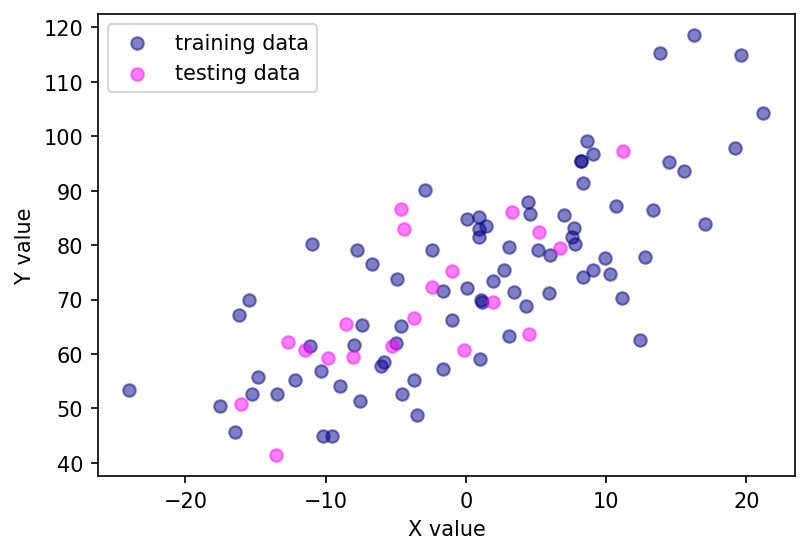

In [4]:
# MODIFY: "test_size" means the fraction of data to be used for testing,
# the rest is training
# split the data into training and testing samples,
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

plt.scatter(Xtrain, Ytrain, color="darkblue", label="training data", alpha=0.5)
plt.scatter(Xtest, Ytest, color="fuchsia", label="testing data", alpha=0.5)
plt.xlabel("X value")
plt.ylabel("Y value")
plt.legend()
plt.show()

In [5]:
# define functional fits
def my_fit(m, c, x):
    # m: the slope of the line
    # c: the y-intercept
    # x: independent variable
    # y: dependent variable / predictand
    y = m * x + c
    return y


def my_gradLoss(xtrain, ytrain, ypred):
    n = float(len(xtrain))
    gradLoss_m = 2 / n * sum(xtrain * (ypred - ytrain))  # derivative wrt m
    gradLoss_c = 2 / n * sum((ypred - ytrain))  # derivative wrt c

    return gradLoss_m, gradLoss_c

In [6]:
L = 0.0001  # MODIFY: the learning rate - the size of the "step" to take down gradient
epochs = 5_000  # MODIFY: the number of iterations to run over the entire training set

# Building the model
m = np.random.uniform()
c = np.random.uniform()

errorHistory = np.empty((epochs,))

# Performing Gradient Descent
for i in range(epochs):

    Y_pred = my_fit(m, c, Xtrain)  # the current predicted value of y
    gradLoss_m, gradLoss_c = my_gradLoss(
        Xtrain, Ytrain, Y_pred
    )  # compute the direction of down gradient of the loss function with respect to the coefficients
    m = m - L * gradLoss_m  # update the slope m
    c = c - L * gradLoss_c  # update the y-intercept c

    errorHistory[i] = 1 / float(len(Y)) * np.sum((Ytrain - Y_pred) ** 2)

print("done training")
print("")
print("  slope (m)             y-int (c)")
print("----------------------------------")
print(str(np.around(m, 5)) + "                 " + str(np.around(c, 5)))

done training

  slope (m)             y-int (c)
----------------------------------
1.51955                 46.08355


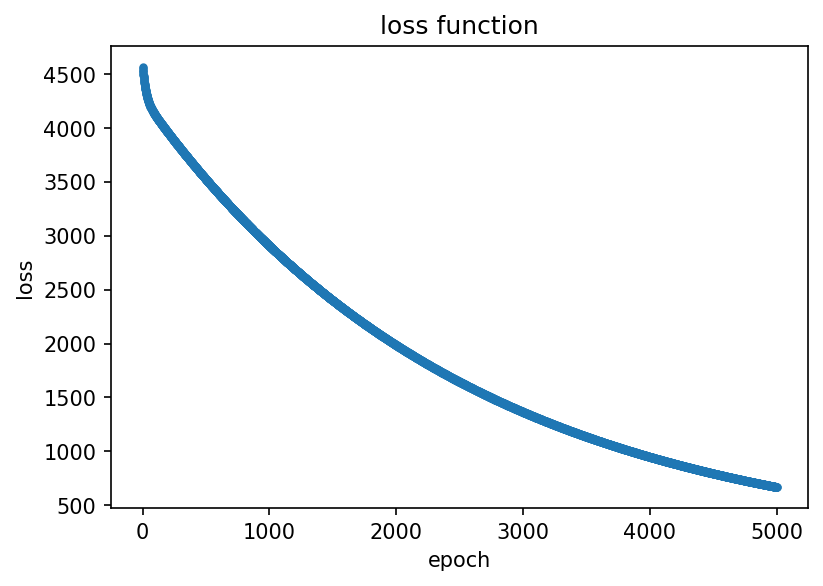

In [7]:
# print the error history
plt.figure()
plt.plot(np.arange(0, len(errorHistory)), errorHistory, ".-")
plt.title("loss function")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

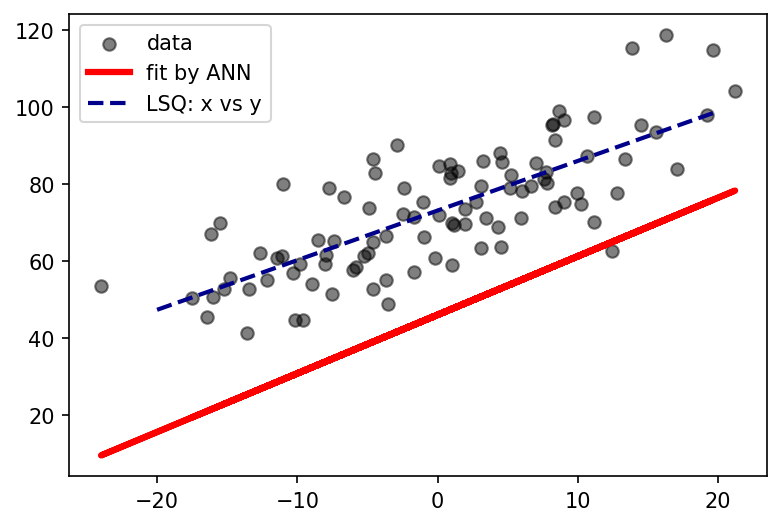

In [8]:
# Making predictions - FINAL
Y_pred = my_fit(m, c, Xtrain)
Y_predTest = my_fit(m, c, Xtest)

plt.figure()
plt.scatter(X, Y, color="black", label="data", alpha=0.5)
# plt.plot(Xtrain, Y_pred, 'x', color='cornflowerblue', label = 'training data')
# plt.plot(Xtest, Y_predTest, 'x', color='fuchsia', label= 'testing data')

plt.plot(Xtrain, Y_pred, "-r", label="fit by ANN", linewidth=3)  # regression line

slope, intercept, r_value, p_value, std_err = stats.linregress(
    np.squeeze(X), np.squeeze(Y)
)
x_plot = np.linspace(-20, 20, 100)
plt.plot(
    x_plot,
    intercept + x_plot * slope,
    "--",
    color="darkblue",
    label="LSQ: x vs y",
    linewidth=2,
)

plt.legend()
plt.show()

In [9]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

/opt/homebrew/Caskroom/miniforge/base/envs/env-ats655/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Gradient descent for polynomial regression

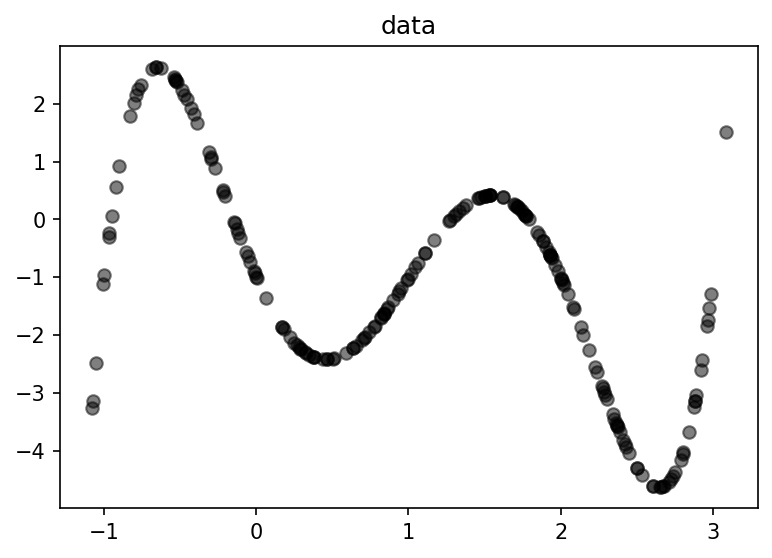

In [80]:
# MAKE THE DATA

# MODIFY: vector of true/actual coefficients for a pth-order polynomial,
# i.e. "the truth"
a_truth = (
    -1.0,
    -6.0,
    5.0,
    5.0,
    -5.0,
    1.0,
)
x = np.random.uniform(low=-1.1, high=3.1, size=200)
y = my_fit(a_truth, x)

plt.figure()
plt.plot(x, y, "ok", alpha=0.5)
plt.title("data")
plt.show()

In [81]:
# define functional fits
def my_fit(a, x):
    # a: regression coefficients
    # x: independent variable
    # y: dependent variable / predictand
    for i in range(len(a)):
        if i == 0:
            y = a[0]
        else:
            y += a[i] * (x**i)
    return y


def my_gradLoss(xtrain, ytrain, ypred, poly_order):
    n = float(len(xtrain))

    gradLoss_a = np.empty(
        poly_order + 1,
    )

    # derivative wrt a_i
    for i in range(poly_order + 1):
        gradLoss_a[i] = (
            2 / n * sum((xtrain**i) * (ypred - ytrain))
        )

    return gradLoss_a

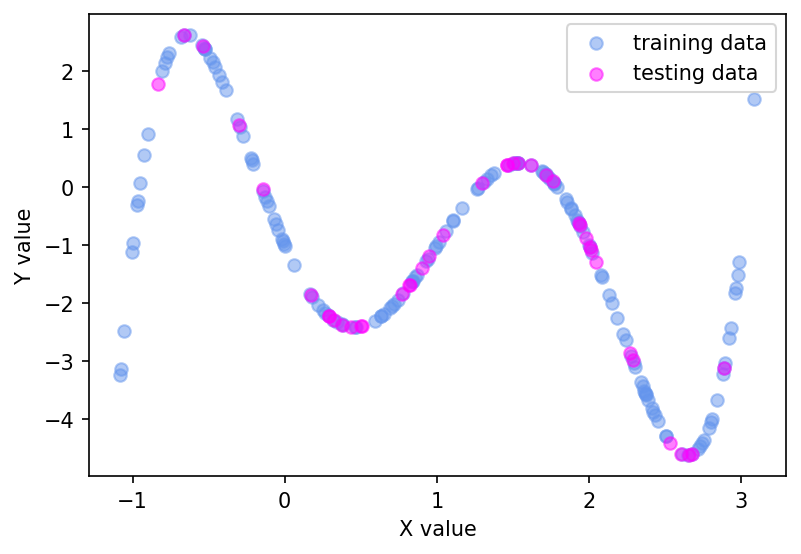

In [82]:
# MODIFY: "test_size" means the fraction of data to be used for testing, the rest is training
# split the data into training and testing samples,
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=41)

plt.scatter(Xtrain, Ytrain, color="cornflowerblue", label="training data", alpha=0.5)
plt.scatter(Xtest, Ytest, color="fuchsia", label="testing data", alpha=0.5)
plt.xlabel("X value")
plt.ylabel("Y value")
plt.legend()
plt.show()

In [83]:
# Build and train the model

# initialize the coefficients
a = np.zeros(len(a_truth))

L = 0.0001  # MODIFY: the learning rate - the size of the "step" to take down gradient
epochs = 50_000  # MODIFY: the number of iterations to run over the entire training set

print("fitting polynomial of order: ", len(a) - 1)

errorHistory = np.empty((epochs,))
# Performing Gradient Descent
for i in range(epochs):
    Y_pred = my_fit(a, Xtrain)  # the current predicted value of y

    # compute the direction of down gradient of the loss function with respect to the coefficients
    gradLoss_a = my_gradLoss(
        Xtrain,
        Ytrain,
        Y_pred,
        poly_order=len(a) - 1,
    )
    a = a - L * gradLoss_a  # update the a coefficients
    errorHistory[i] = 1 / float(len(Y)) * np.sum((Ytrain - Y_pred) ** 2)

print("done training")
print("--------------------------------")

# print the estimate and the truth of the coefficients
print("COEFFICIENTS\nPredicted; Actual")
for i in range(len(a)):
    print(f"{np.around(a[i], 3):<11.4} {a_truth[i]:<10.4}")

fitting polynomial of order:  5
done training
--------------------------------
COEFFICIENTS
Predicted; Actual
-0.264      -1.0      
-0.902      -6.0      
1.047       5.0       
0.664       5.0       
-1.057      -5.0      
0.242       1.0       


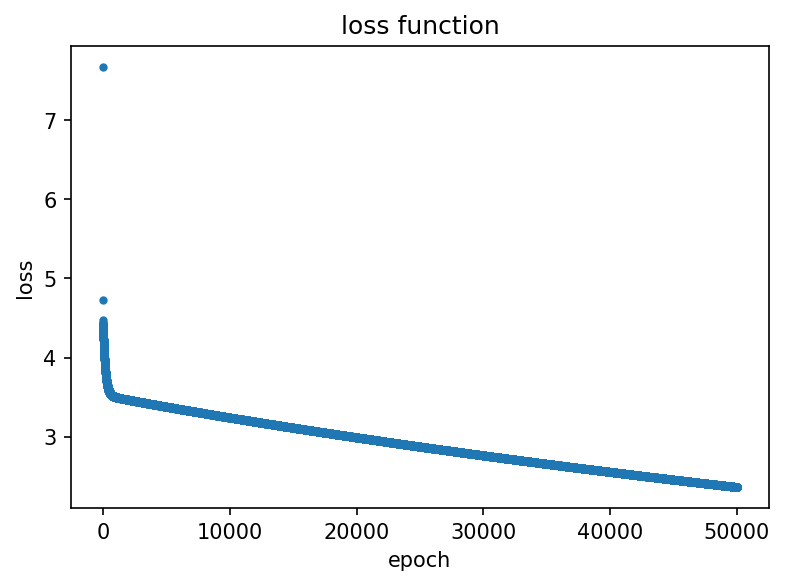

In [84]:
# print the error history
plt.figure()
plt.plot(np.arange(0, len(errorHistory)), errorHistory, ".")
plt.title("loss function")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

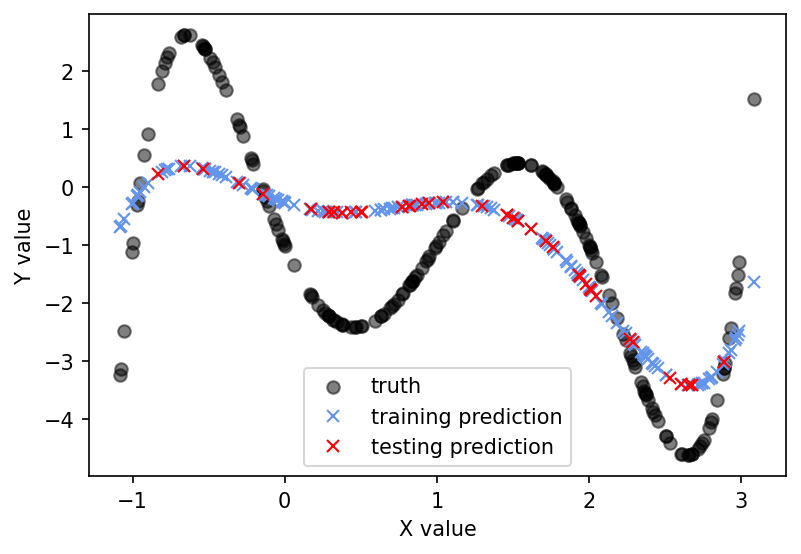

In [85]:
# plot results on training and testing data

Ypred_train = my_fit(a, Xtrain)
Ypred_test = my_fit(a, Xtest)

plt.scatter(x, y, marker="o", color="black", label="truth", alpha=0.5)

plt.plot(Xtrain, Ypred_train, "x", color="cornflowerblue", label="training prediction")
plt.plot(Xtest, Ypred_test, "x", color="red", label="testing prediction")

plt.xlabel("X value")
plt.ylabel("Y value")
plt.legend()
plt.show()